In [28]:
# Iremos explorar o dataset do RH da IBM, disponivel no Kaggle. 
# Nele temos disponivel a relação entre funcionarios e a empresa. 
# A variavel-alvo é o atrito, iremos explorar se as demias variaveis influenciam no atrito. 
# Podemos interpretar Atrito como funcionarios que deixaram a empresa.

In [29]:
import pandas as pd 

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [30]:
df.shape

(1470, 35)

In [31]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [32]:
# Hipoteses: 
    
    # Sera que existe relação entre a idade e o atrito? 
    # Qual a diferença entre a idade de quem deixa a empresa vs. quem não deixa? 
    # Sera que existe relação entre a idade e o atrito? 

In [33]:
df.groupby('Attrition')['Age'].mean()

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

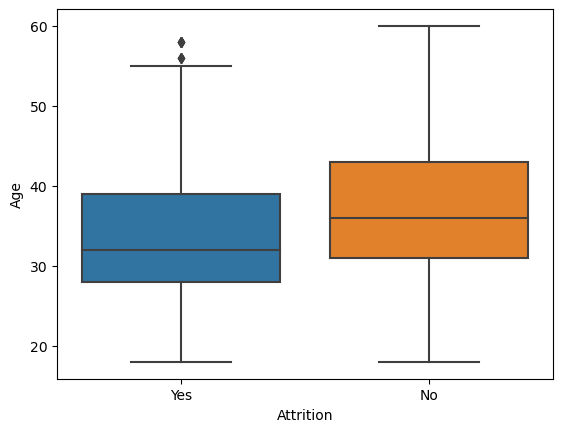

In [34]:
import seaborn as sns 
sns.boxplot(x='Attrition', y='Age', data =df)

In [35]:
df.groupby('Attrition')['Age'].median()


Attrition
No     36.0
Yes    32.0
Name: Age, dtype: float64

In [36]:
# Usando a função de agrupar podemos ver que a media de idade é maior para quem não deixa a empresa. 
# O box-plot confirma isso, mostrando a distrubuição das idades.
# Isso pode ser um indicio que idade é um fator que explicaria o problema na relação dos funcionarios com a empresa. 
# Sera que a empresa tem alguma politica conflitante com os jovens? Isso poderia ser explorada internamente por especialistas do RH.


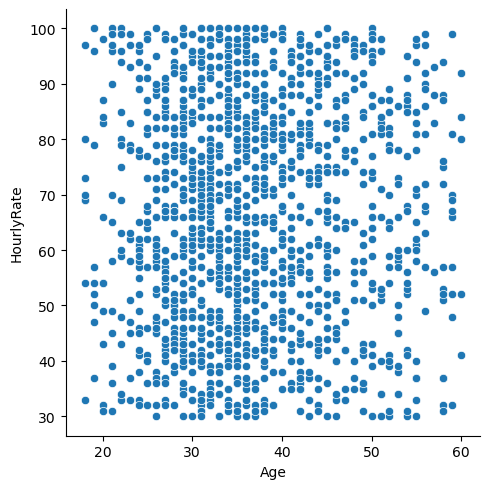

In [37]:
# Existe relação entre idade e salario? 

sns.relplot(x='Age', y='HourlyRate', data=df);

In [38]:
# O grafico mostra que não há uma relação clara entre idade x salario. 

In [39]:
# Existe relação entre o tempo da ultima promoção e idade? (vamos ver somente o top 5)

print(df.groupby('YearsSinceLastPromotion')['Age'].mean().head(5))



YearsSinceLastPromotion
0    35.641997
1    36.190476
2    36.591195
3    37.942308
4    40.770492
Name: Age, dtype: float64


In [40]:
# Parece que quanto mais velho, maior satisfação 


# Agora sera analisado o numero de valores da coluna Attrition

In [52]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [53]:
df.Attrition.value_counts(1)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

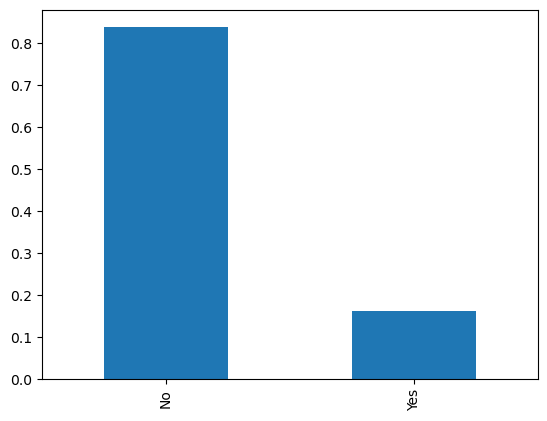

In [57]:
df.Attrition.value_counts(1).plot.bar();

In [ ]:
# Paodemos observar que Attrition esta desbalenceada, mais pessoas não possuem atritos com a empresa.


In [63]:
# Vamos analisar se algumas variaveis possuem alta correlação com a idade, positiva ou negativa.

df[['Age', 'DistanceFromHome', 'MonthlyIncome','PerformanceRating','YearsAtCompany','YearsInCurrentRole']].corr()

,Age,DistanceFromHome,MonthlyIncome,PerformanceRating,YearsAtCompany,YearsInCurrentRole
Age,1.000000,-0.001686,0.497855,0.001904,0.311309,0.212901
DistanceFromHome,-0.001686,1.000000,-0.017014,0.027110,0.009508,0.018845
MonthlyIncome,0.497855,-0.017014,1.000000,-0.017120,0.514285,0.363818
PerformanceRating,0.001904,0.027110,-0.017120,1.000000,0.003435,0.034986
YearsAtCompany,0.311309,0.009508,0.514285,0.003435,1.000000,0.758754
YearsInCurrentRole,0.212901,0.018845,0.363818,0.034986,0.758754,1.000000


In [ ]:
# Há poucas corralações relevantes, talvez a unica que tenha uma correlação seja MonthlyIncome.

In [74]:
# Analisaremos agora algumas estatisticas para funcionarios com mais de 55 anos

df_temp = df.query('Age > 55')

df_temp.groupby('Attrition')['Age', 'DailyRate' ,'DistanceFromHome', 'HourlyRate'].agg(['min', 'median', 'mean', 'max'])


C:\Users\leona\AppData\Local\Temp\ipykernel_6508\1131282921.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_temp.groupby('Attrition')['Age', 'DailyRate' ,'DistanceFromHome', 'HourlyRate'].agg(['min', 'median', 'mean', 'max'])


Age                       DailyRate                           \
          min median       mean max       min median        mean   max   
Attrition                                                                
No         56   58.0  57.846154  60       142  832.0  870.333333  1499   
Yes        56   58.0  57.250000  58       147  375.5  502.125000  1162   

          DistanceFromHome                       HourlyRate                    \
                       min median       mean max        min median       mean   
Attrition                                                                       
No                       1    7.0   9.025641  29         32   70.0  69.410256   
Yes                      2    7.0  10.125000  24         31   64.5  65.875000   

               
          max  
Attrition      
No         99  
Yes        97

In [59]:
# E para finalizar sera feito um cruzamento para analizarmos a relação entre o departamento e a area de formação dos funcionarios.


pd.crosstab(df['Department'], df['EducationField'])

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,27,16,0,13,3,4
Research & Development,0,440,0,363,64,94
Sales,0,150,159,88,15,34


In [ ]:
# Aqui notamos que o departamento de P&D tem mais pessoas de LifeSciences e Medical. 